In [2]:
import numpy as np
import matplotlib.pyplot as plt

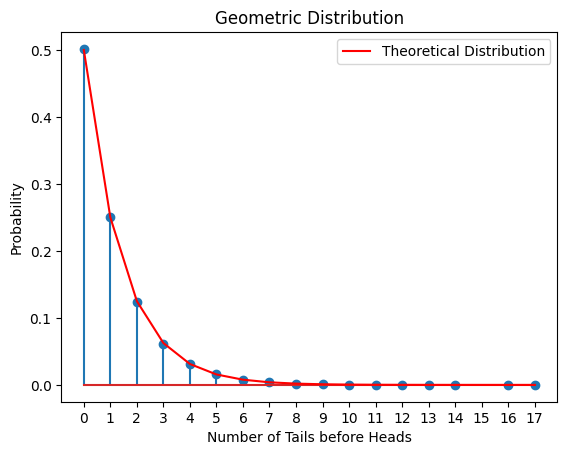

In [3]:
# Geometric Distribution

def toss_coin_until_heads(p):
    i = 0
    while np.random.rand() > p:
        i += 1
    return i

from collections import Counter

n = 100000
p = 0.5
tosses = np.array([toss_coin_until_heads(p) for _ in range(n)])
X = Counter(tosses)

plt.stem(X.keys(), [y / n for y in X.values()])

# Plot the theoretical distribution on the same graph
x = np.arange(0, max(X.keys()) + 1)
plt.plot(x, p * (1 - p) ** x, 'r', label='Theoretical Distribution')
plt.xlabel('Number of Tails before Heads')
plt.ylabel('Probability')
plt.title('Geometric Distribution')
plt.legend()
plt.xticks(np.arange(0, max(X.keys()) + 1))
plt.show()

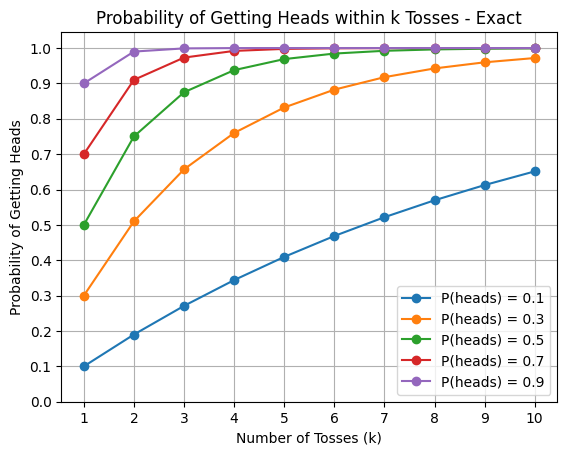

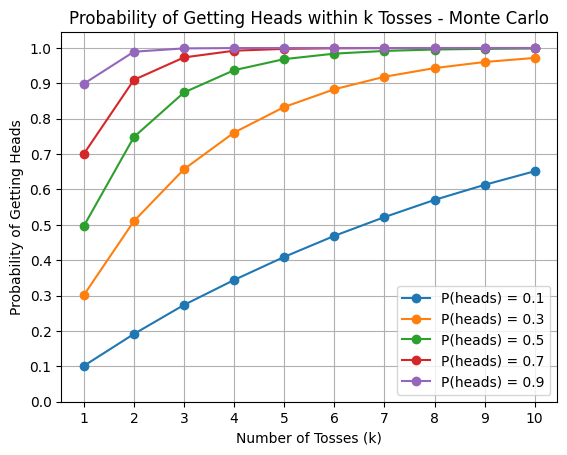

In [18]:
# What is the probability of getting a head within k tosses?

from scipy.stats import geom

def make_graph(exact):
    n = 100000
    ps = np.arange(0.1, 1.0, 0.2)

    ks = np.arange(1, 11)

    def prob_curve(p):
        """Calculate the probability of getting heads within k tosses for a given p."""
        if exact:
            def prob_heads_within_k_tosses(k):
                return geom.cdf(k, p)
        else:
            tosses = np.array([toss_coin_until_heads(p) for _ in range(n)])

            def prob_heads_within_k_tosses(k):
                return (tosses < k).mean()

        probs = [prob_heads_within_k_tosses(k) for k in ks]

        return probs

    probs = [prob_curve(p) for p in ps]

    for i, p in enumerate(ps):
        plt.plot(ks, probs[i], marker='o', label=f'P(heads) = {p:.1f}')
    plt.xlabel('Number of Tosses (k)')
    plt.ylabel('Probability of Getting Heads')
    plt.title(f'Probability of Getting Heads within k Tosses - {"Exact" if exact else "Monte Carlo"}')
    plt.xticks(ks)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.grid()
    plt.legend()
    plt.show()

make_graph(exact=True)
make_graph(exact=False)